# Assignment 4
## Task 1
If you were to create a HMM for 22 two-state appliances, how much memory would your computer need if you wanted to fit the state-transition probability matrix into main memory with 4 byte precision? 

Answer: around 70 terra bytes

## What was given:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

map1 = {'0,0':0, '1,0':1, '0,1':2, '1,1':3}
map2 = {0:'0,0', 1:'1,0', 2:'0,1', 3:'1,1'}
states = ['0,0', '1,0', '0,1', '1,1']

mu = {'0,0':1, '1,0':50, '0,1':55, '1,1':105}
sigma = {'0,0':0.1, '1,0':5.1, '0,1':6.1, '1,1':11.1}

trans_prob = [[0.8, 0.19, 0.01, 0], [0.32, 0.6, 0, 0.08], [0.1, 0, 0.7, 0.2], [0, 0.13,0.5, 0.37]]
initial_prob = [0.25, 0.25, 0.25, 0.25]

'''
The map function makes accessing the trans_prob's easy:

Let's say you want p(z_t = (1,1) | z_t-1 = (0,1))
This is just:

trans_prob[map1['0,1']][map1['1,1']]
'''


"\nThe map function makes accessing the trans_prob's easy:\n\nLet's say you want p(z_t = (1,1) | z_t-1 = (0,1))\nThis is just:\n\ntrans_prob[map1['0,1']][map1['1,1']]\n"

## Task 2

In [42]:
#Solution:
z = [np.random.choice(states, p=initial_prob)]

for _ in range(99):
    z.append(np.random.choice(states, p=trans_prob[map1[z[-1]]]))
print(z)

x = []
for i in range(100):
    x.append(np.random.normal(mu[z[i]], sigma[z[i]]))

print(x)

['0,1', '0,1', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '1,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '1,0', '0,0', '0,0', '0,0', '0,0', '0,0', '1,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '1,0', '1,0', '1,0', '1,0', '1,0', '1,0', '0,0', '1,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '1,0', '1,0', '1,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '1,0', '1,0', '1,0', '1,0', '1,0', '1,0', '1,0', '1,0', '1,1', '1,1', '0,1', '0,1', '1,1', '0,1', '0,1', '0,1', '0,0', '1,0', '1,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '1,0', '1,0', '1,1', '1,1', '1,1']
[45.17019739566273, 51.2381206049318, 1.0240402193864884, 0.9856875220237169, 0.990331228998422, 1.006644212525503, 0.9809826648776314, 1.0074747968278441, 1.1013149975646148, 42.131101520213214, 0.8292835023492124, 0.967031324884251, 1.1108343291728113, 0.876633914259869, 0.9279477769110602, 1.083

## Task 3

In [48]:
import scipy.stats

prob = 0.25

for i in range(99):
    prob *= trans_prob[map1[z[i]]][map1[z[i+1]]]
    
for i in range(100):
    prob *= scipy.stats.norm(mu[z[i]], np.sqrt(sigma[z[i]])).pdf(x[i])
    
prob
    
#a better solution is to add log-probs

2.721358776857677e-109

## Task 4

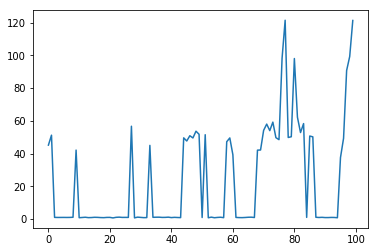

In [49]:
plt.plot(x)

## Task 5

In [59]:
def gauss(x, mu, sig):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-0.5*(float(x-mu)/sig)**2)

# Solution:
P1 = []
for x_val in x:
    slc = []
    for s in states:
        slc.append(gauss(x_val, mu[s], sigma[s]))
    P1.append(slc)
P1 = np.array(P1)

P1 = P1/np.sum(P1, axis=1).reshape(-1, 1)
P1.shape

(100, 4)

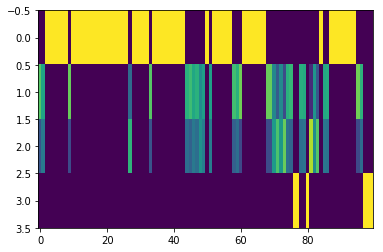

In [69]:
plt.imshow(P1.T, aspect="auto", interpolation="nearest")

## Task 6/7/8

In [74]:
def matrixP2(x):
    alphas = []
    for i in range(len(states)):
        alphas.append(initial_prob[i] * gauss(x[0], mu[states[i]], sigma[states[i]]))
    
    alphalist = [alphas]
    for t in range(99):
        alphas = alphalist[-1]
        newlist = []
        for s in states:
            alpha_ele = 0
            for j in range(len(states)):
                alpha_ele += trans_prob[j][map1[s]]*alphas[j]
            alpha_ele *= gauss(x[t+1], mu[s], sigma[s])
            newlist.append(alpha_ele)
        alphalist.append(newlist.copy())
    return np.asarray(alphalist)

P2 = matrixP2(x)


In [72]:
def matrixP3(P2):
    return matrixP2(x,z)/np.sum(matrixP2(x,z), axis=1).reshape(-1,1)

P3 = matrixP3(P2)

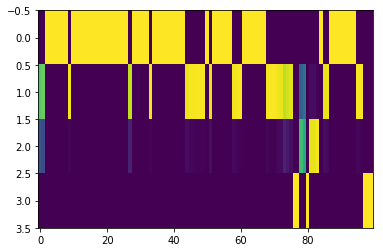

In [73]:
plt.imshow(P3.T, aspect="auto", interpolation="nearest")

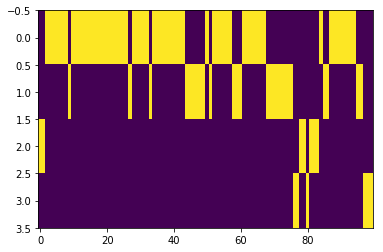

In [75]:
P0 = []
for zt in z:
    slc = np.zeros((4,))
    slc[map1[zt]] = 1
    P0.append(slc)
P0 = np.array(P0)

plt.imshow(np.array(P0).T, aspect='auto', interpolation='nearest')

## Task 9
Yes! The posterior of P3 is much sharper than P1 and when comparing to the ground truth, it avoids some of the error that the naive approach makes.

In [80]:
P3_val = np.argmax(P3, axis=1)

In [81]:
P0_val = np.argmax(P0, axis=1)

In [82]:
P1_val = np.argmax(P1, axis=1)

In [84]:
acc_3 = sum(P3_val == P0_val)/len(P3_val)
acc_1 = sum(P1_val == P0_val)/len(P1_val)

acc_3, acc_1

(0.98, 0.89)